# PREDICTING SEPSIS RISK DURING IN-PATIENT ADMISSIONS
*Client: Royal Perth Hospital*

*Team: Group 7*

# Readme
The following libraries need to be installed in order to run the source code.

In [1]:
import pandas as pd
import numpy as np, warnings
from pathlib import Path
import os
import sweetviz as sv
from importlib import reload

np.warnings = warnings

In [14]:
# import utility functions
import src.utils as utils

# Note: to run main notebook from root directory, use:
ROOT_DIR = Path('')
# setup OS agnostic pathnames
# ROOT_DIR = Path('..')

import src.DataLoader as DataLoader
reload(DataLoader)

dataLoader = DataLoader.DataLoader(ROOT_DIR)

# 1.Dataset Processing

## 1.1 Data Cleaning

Load the dataset. The following tables are loaded for this project:
- LABEVENTS
- MICROBIOLOGYEVENTS
- D_ICD_DIAGNOSES
- D_ITEMS

In [3]:
df_desc_icd, df_desc_labitems, df_desc_items = dataLoader.load_descriptions()

The DIAGNOSES_ICD tables has a column ICD9_CODE which is the code for each disease diagnosed for the patient.

- The Sepsis has 6 codes: ['77181', '99591', '99592', '67020', '67022', '67024']

- We'll introduce a new column, IS_SEPSIS, as a binary classifier (1 for 6 sepsis ICD9 codes, 0 otherwise) for the target variable.

In [4]:
df_diagnoses_icd = dataLoader.load_diagnoses_icd(df_desc_icd)

The Demographic dataframe is a combination of the patient and admission datasets. Adding some columns:
- AGE: the age of the patient at the admitted year
- IS_SEPSIS: indicating whether this is a sepsis case or not


The labevents dataframe is loaded. Admissions under 18 years old are removed

In [7]:
df_demographic = dataLoader.load_demographic(df_diagnoses_icd)

Removed 8210 admissions with AGE < 18


<Axes: title={'center': 'AGE'}, xlabel='IS_SEPSIS'>

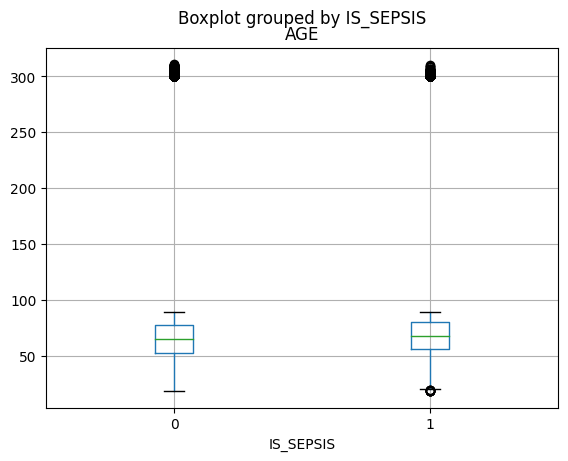

In [8]:
# plotting the age of admissions
df_demographic.boxplot(column=['AGE'], by='IS_SEPSIS')

In [9]:
count_over100 = len(df_demographic[df_demographic.AGE>100])
p_over100 = len(df_demographic[df_demographic.AGE>100])/len(df_demographic)*100
median_age = int(df_demographic['AGE'].median())
print('The number of admissions aged over 100 years old is: {} admissions ({:.2f}% over all admissions)'.format(count_over100, p_over100))
print('The median age of patients: {}'.format(median_age))

The number of admissions aged over 100 years old is: 2616 admissions (5.15% over all admissions)
The median age of patients: 65


We replace those with aged > 100 by the median age of patients

In [10]:
df_demographic = dataLoader.demographic_clean_AGE(df_demographic)

The labevents dataframe is loaded. The records of admissions under 18 years old are removed.
- The empty HADM_ID is this are cleaned

In [6]:
df_labevents = dataLoader.load_labevents(df_demographic)

Calculate the TIME from for labevents from ADMITTIME to CHARTTIME
- A column NEW_ADMITTIME is added: if CHARTTIME < ADMITTIME, the NEW_ADMITTIME is the CHARTTIME, otherwise, use the ADMITTIME

In [12]:
df_labevents = dataLoader.labevents_compute_TIME(df_labevents, df_demographic)

## 1.2 Data Exploration

## 1.3 Feature Selection

# 2.Sepsis Risk Predicting Model Implementation

In [15]:
dataLoader.create_train_data(df_labevents, df_demographic, df_desc_labitems, hours=0, feature_no=20)

In [ ]:
dataLoader.create_train_data(df_labevents, df_demographic, df_desc_labitems, hours=2, feature_no=20)

In [ ]:
dataLoader.create_train_data(df_labevents, df_demographic, df_desc_labitems, hours=4, feature_no=20)